In [1]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1";


%load_ext autoreload
%autoreload 2
from CW import CW
from FGSM import FGSM
from OPT_attack import OPT_attack
from OPT_attack_polar import OPT_attack_polar
from OPT_attack_polar_GD import OPT_attack_polar_GD
from OPT_attack_lsq import OPT_attack_lsq
from OPT_attack_polar_lsq import OPT_attack_polar_lsq
from OPT_attack_GD import OPT_attack_GD
from OPT_genattack import OPT_genattack
from OPT_attack_sign_SGD import OPT_attack_sign_SGD
from ZOO import ZOO
from OPT_attack_lf import OPT_attack_lf
from nes_attack import NES
from models import PytorchModel
import torch
from allmodels import MNIST, load_model, load_mnist_data, load_cifar10_data, CIFAR10
import os
import numpy as np
import matplotlib.pyplot as plt

Files already downloaded and verified
Files already downloaded and verified
tensor([3])
tensor([8])
tensor([8])
tensor([0])
tensor([6])
tensor([6])
tensor([1])
tensor([6])
tensor([3])
tensor([1])
tensor([0])
tensor([9])
tensor([5])
tensor([7])
tensor([9])
tensor([8])
tensor([5])
tensor([7])


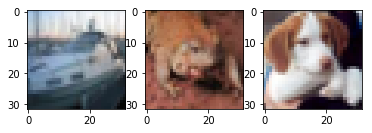

In [2]:
net = CIFAR10()
net.cuda()
net = torch.nn.DataParallel(net, device_ids=[0])
# print(net)
load_model(net,'cifar10_gpu.pt')
net.eval()
model = net.module if torch.cuda.is_available() else net
# model = model.cpu()
train_loader, test_loader, train_dataset, test_dataset = load_cifar10_data()

X0, Y0 = None, None
X1, Y1 = None, None
X2, Y2 = None, None
for i, (xi,yi) in enumerate(test_loader):
    print(yi)
    if i==2:
        X0, Y0 = xi, yi
    if i==5:
        X1, Y1 = xi, yi
    if i==16:
        X2, Y2 = xi, yi
    if i==17:
        break
amodel = PytorchModel(model, bounds=[0,1], num_classes=10)

def plot_adv(X, adv):
    plt.subplot(1,2,1)
    plt.imshow(np.transpose(X[0].numpy(), (1, 2, 0)))
    plt.subplot(1,2,2)
    plt.imshow(np.transpose(adv.cpu()[0].numpy(), (1, 2, 0)))
    plt.show()

# Plot the sample images
plt.subplot(1,3,1)
plt.imshow(np.transpose(X0[0].numpy(), (1, 2, 0)))
plt.subplot(1,3,2)
plt.imshow(np.transpose(X1[0].numpy(), (1, 2, 0)))
plt.subplot(1,3,3)
plt.imshow(np.transpose(X2[0].numpy(), (1, 2, 0)))
plt.show()

In [13]:
x, y = X1, Y1
seed = 10
target = 4

### UNTARGETED

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Searching for the initial direction on 100 random directions: 
--------> Found distortion 26.2496
--------> Found distortion 5.2879
==========> Found best distortion 5.2879 in 0.3255 seconds using 232 queries
Iteration  10 distortion 0.5566 num_queries 3296
Iteration  20 distortion 0.1586 num_queries 5169
Iteration  30 distortion 0.1218 num_queries 6675
Iteration  40 distortion 0.0990 num_queries 8123
Iteration  50 distortion 0.0875 num_queries 9444
Iteration  60 distortion 0.0774 num_queries 10808
Iteration  70 distortion 0.0714 num_queries 12147
Iteration  80 distortion 0.0661 num_queries 13419
Iteration  90 distortion 0.0620 num_queries 14717
Iteration 100 distortion 0.0593 num_queries 15987
Iteration 110 distortion 0.0563 num_queries 17306
Iteration 120 distortion 0.0541 num_queries 18582
Iteration 130 distortion 0.0522 num_queries 19902
Iteration 140 distortion 0.0505 num_queries 21144
Iteration 150 distortion 0.0487 num_queries 22306
Iteration 160 distortion 0.0476 num_queries 23

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Iteration 290 distortion 0.0406 num_queries 46684
Stopping criteria reached

Adversarial Example Found Successfully: distortion 0.0406 target 5 queries 46916 
Time: 69.3648 seconds


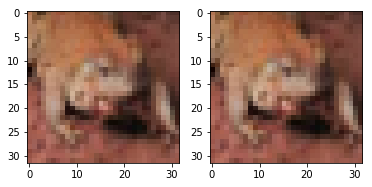

In [14]:
attack = OPT_attack(amodel)
adv, dist = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv)

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Running gradient descent with start learning rate  1.0
Searching for the initial direction on 100 random directions: 
--------> Found distortion 26.2496
--------> Found distortion 5.2879
==========> Found best distortion 5.2879 in 0.3239 seconds using 232 queries
Iteration   1 distortion 2.4849 num_queries 667
Iteration   6 distortion 0.1468 num_queries 2216
Iteration  11 distortion 0.0916 num_queries 3489
Iteration  16 distortion 0.0582 num_queries 4857
Iteration  21 distortion 0.0483 num_queries 6083


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Success: stopping threshold reached

Adversarial Example Found Successfully: distortion 0.0447 target 5 queries 6843 
Time: 11.4524 seconds


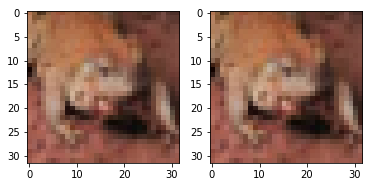

In [15]:
attack = OPT_attack_sign_SGD(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed)
plot_adv(x, adv_sign)

/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


Running gradient descent with start learning rate  1.0
Searching for the initial direction on 100 random directions: 
--------> Found distortion 26.2496
--------> Found distortion 5.2879
==========> Found best distortion 5.2879 in 0.3395 seconds using 232 queries
Iteration   1 distortion 4.0385 num_queries 539
Iteration   6 distortion 0.1291 num_queries 2367
Iteration  11 distortion 0.0719 num_queries 3758
Iteration  16 distortion 0.0555 num_queries 4995
Iteration  21 distortion 0.0464 num_queries 6222
Success: stopping threshold reached

Adversarial Example Found Successfully: distortion 0.0464 target 5 queries 6222 
Time: 10.1761 seconds


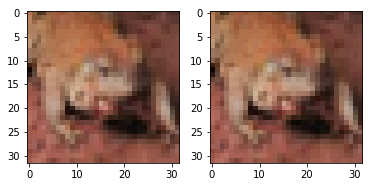

In [16]:
attack = OPT_attack_sign_SGD(amodel)
adv_sign, dist_sign = attack(x.cuda(), y.cuda(), seed=seed, svm=True)
plot_adv(x, adv_sign)

### TARGETED

Targeted attack - Source: 6 and Target: 4 Seed: 10
Searching for the initial direction on 100 samples: 
--------> Found distortion 5.2690
--------> Found distortion 4.2136


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


==========> Found best distortion 4.2136 in 1.7327 seconds using 1140 queries
Iteration  10 distortion 1.5849 num_queries 4238
Iteration  20 distortion 1.0353 num_queries 6695
Iteration  30 distortion 0.8513 num_queries 8618
Iteration  40 distortion 0.6892 num_queries 10423
Iteration  50 distortion 0.5804 num_queries 12106
Iteration  60 distortion 0.5237 num_queries 13827
Iteration  70 distortion 0.4748 num_queries 15604
Iteration  80 distortion 0.4399 num_queries 17275
Iteration  90 distortion 0.4200 num_queries 18979
Iteration 100 distortion 0.3894 num_queries 20553
Iteration 110 distortion 0.3607 num_queries 22085
Iteration 120 distortion 0.3451 num_queries 23718
Iteration 130 distortion 0.3354 num_queries 25256
Iteration 140 distortion 0.3267 num_queries 26863
Iteration 150 distortion 0.3198 num_queries 28437
Iteration 160 distortion 0.3142 num_queries 30006
Iteration 170 distortion 0.3059 num_queries 31567
Iteration 180 distortion 0.2986 num_queries 33199
Iteration 190 distortion 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Adversarial Example Found Successfully: distortion 0.1993 target 4 queries 81226 
Time: 120.1514 seconds


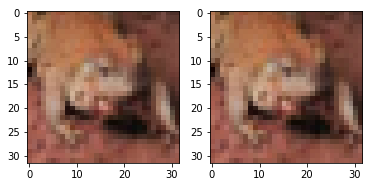

In [17]:
attack = OPT_attack(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

Targeted attack - Source: 6 and Target: 4
Searching for the initial direction on 100 samples: 
--------> Found distortion 5.2690
--------> Found distortion 4.2136


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


==========> Found best distortion 4.2136 in 1.7346 seconds using 1140 queries
Iteration   1 distortion 3.0800 num_queries 1459
Iteration   6 distortion 0.7286 num_queries 4387
Iteration  11 distortion 0.4356 num_queries 5766
Iteration  16 distortion 0.3141 num_queries 7126
Iteration  21 distortion 0.2741 num_queries 8392
Iteration  26 distortion 0.2380 num_queries 9607


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Success: stopping threshold reached

Adversarial Example Found Successfully: distortion 0.2377 target 4 queries 9840 LS queries 3300 
Time: 13.5664 seconds


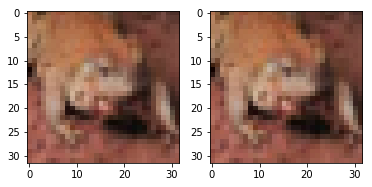

In [18]:
attack = OPT_attack_sign_SGD(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed)
plot_adv(x, adv)

Targeted attack - Source: 6 and Target: 4
Searching for the initial direction on 100 samples: 
--------> Found distortion 5.2690
--------> Found distortion 4.2136


/home/simranjit/blackbox/attackbox-master/models.py:26: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  image = Variable(image, volatile=True) # ?? not supported by latest pytorch


==========> Found best distortion 4.2136 in 1.7316 seconds using 1140 queries
Iteration   1 distortion 3.6252 num_queries 2012
Iteration   6 distortion 0.6060 num_queries 4729
Iteration  11 distortion 0.3934 num_queries 6035
Iteration  16 distortion 0.3095 num_queries 7480
Iteration  21 distortion 0.2623 num_queries 8815
Iteration  26 distortion 0.2354 num_queries 9993
Iteration  31 distortion 0.2214 num_queries 11234
Success: stopping threshold reached

Adversarial Example Found Successfully: distortion 0.2214 target 4 queries 11234 LS queries 3894 
Time: 16.7447 seconds


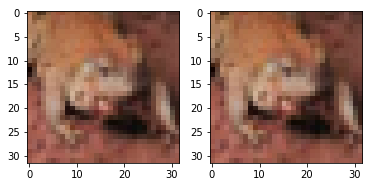

In [19]:
attack = OPT_attack_sign_SGD(amodel, train_dataset=train_dataset)
adv, dist = attack(x.cuda(), y.cuda(), target=target*torch.ones(1, dtype=torch.long).cuda(), seed=seed,
                  svm=True)
plot_adv(x, adv)